In [17]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('notebook')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

In [19]:
models = ['resnet', 'densenet', 'b-resnet', 'b-densenet', 'msdnet']

pc_runs = {
    'resnet': pd.read_csv('jetson-resnet_inference_test.csv', index_col=0),
    'densenet': pd.read_csv('jetson-densenet_inference_test.csv', index_col=0),
    'b-resnet': pd.read_csv('jetson-b-resnet-fine_inference_test.csv', index_col=0),
    'b-densenet': pd.read_csv('jetson-b-densenet-fine_inference_test.csv', index_col=0),
    'msdnet' : pd.read_csv('jetson-msdnet-fine1_inference_test.csv', index_col=0)
}
pc_runs

{'resnet':       threshold                    exit  prediction  target  correct  \
 0           0.5  conventional inference           0       0     True   
 1           0.5  conventional inference           0       0     True   
 2           0.5  conventional inference           0       0     True   
 3           0.5  conventional inference           0       0     True   
 4           0.5  conventional inference           0       0     True   
 ...         ...                     ...         ...     ...      ...   
 4995        0.5  conventional inference          99      99     True   
 4996        0.5  conventional inference          99      99     True   
 4997        0.5  conventional inference          99      99     True   
 4998        0.5  conventional inference          99      99     True   
 4999        0.5  conventional inference          99      99     True   
 
       score_margin      time  
 0         0.999717  2.759760  
 1         0.999745  0.101201  
 2         0.999

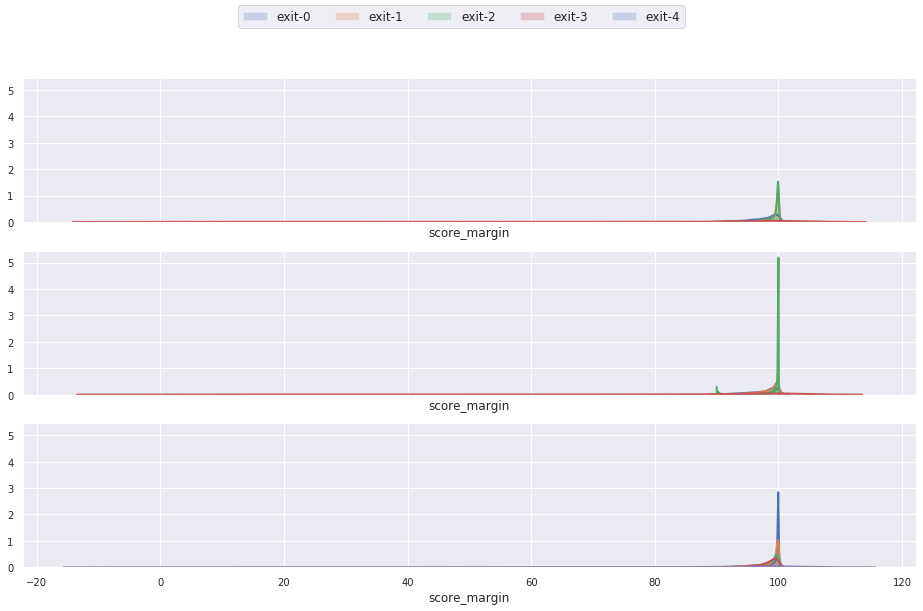

In [5]:
fig, axes = plt.subplots(3,1, figsize=(16,9), sharex=True, sharey=True)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=False, kde=True, bins=100)

for score in pc_runs['b-resnet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[1], **kwargs)

for score in pc_runs['b-densenet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[0], **kwargs)

for score in pc_runs['msdnet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[2], **kwargs)
fig.legend(['exit-{}'.format(x) for x in range(5)], loc='upper center', #bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=False, ncol=5, fontsize='large')


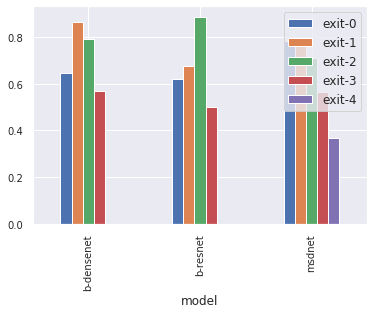

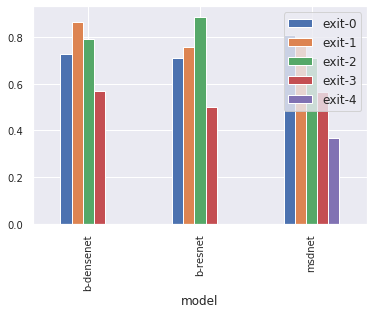

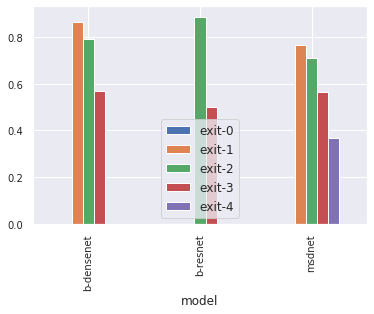

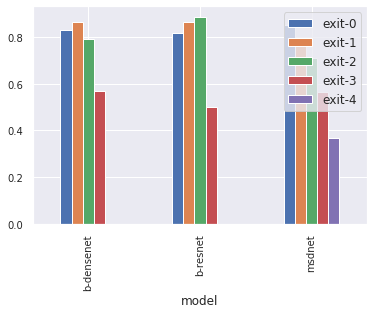

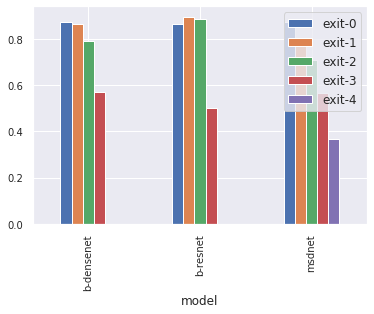

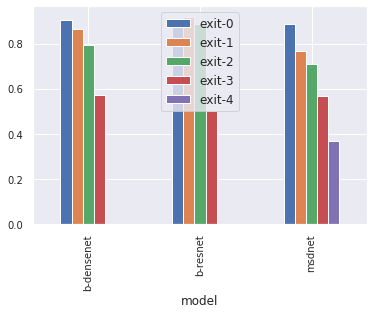

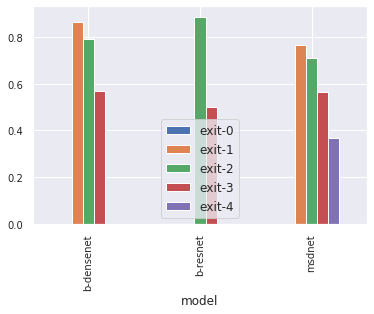

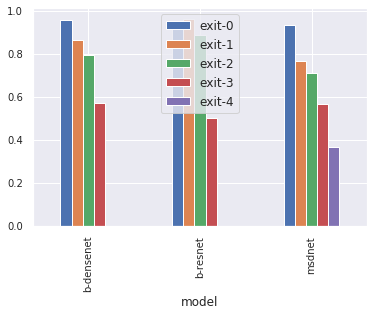

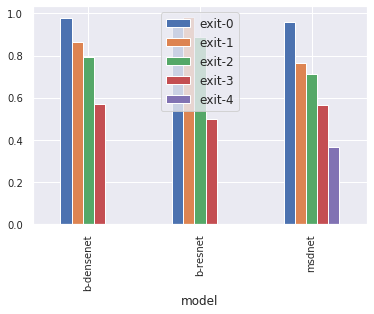

In [24]:
models = ['b-densenet', 'b-resnet', 'msdnet']

for i in x:
    df = pd.DataFrame({
            'model':models,
            'exit-0':np.array([ee_dense.loc[(ee_dense['exit']==0) & (ee_dense['threshold']==i)].mean().correct, 
             ee_res.loc[(ee_res['exit']==0) & (ee_res['threshold']==i)].mean().correct, 
             ee_msd.loc[(ee_msd['exit']==0) & (ee_msd['threshold']==i)].mean().correct]),
            'exit-1':np.array([ee_dense.loc[ee_dense['exit']==1].mean().correct, 
             ee_res.loc[(ee_res['exit']==1) & (ee_res['threshold']==i)].mean().correct, 
             ee_msd.loc[ee_msd['exit']==1].mean().correct]),
            'exit-2': np.array([ee_dense.loc[ee_dense['exit']==2].mean().correct, 
             ee_res.loc[ee_res['exit']==2].mean().correct, 
             ee_msd.loc[ee_msd['exit']==2].mean().correct]),
            'exit-3': np.array([ee_dense.loc[ee_dense['exit']==3].mean().correct, 
             ee_res.loc[ee_res['exit']==3].mean().correct, 
             ee_msd.loc[ee_msd['exit']==3].mean().correct]),
            'exit-4': np.array([ee_dense.loc[ee_dense['exit']==4].mean().correct, 
             ee_res.loc[ee_res['exit']==4].mean().correct, 
             ee_msd.loc[ee_msd['exit']==4].mean().correct])

    })

    df.set_index('model').plot(kind='bar')

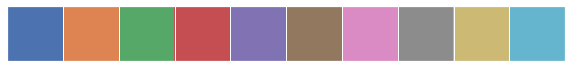

In [6]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [22]:
current_palette.as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

In [24]:
x = np.around(np.linspace(0.9,1,10),2)
cols=["Mean Accuracy", "Mean Time", "Std. Accuracy", "Std. Time"]
pc_runs_stats = {model: pd.DataFrame(
    columns=cols) for model in models[2:]}
pc_runs_stats

{'b-resnet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: [], 'b-densenet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: [], 'msdnet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: []}

In [25]:
for model in pc_runs_stats:
    for treshold in pc_runs[model].groupby(['threshold']):
        mean = treshold[1].mean()
        std = treshold[1].std()
        pc_runs_stats[model] = pc_runs_stats[model].append(dict(zip(cols, [mean.correct, mean.time, std.correct, std.time])),ignore_index=True)
    pc_runs_stats[model] = pc_runs_stats[model].set_index(pd.Index(x))

In [26]:
pc_runs_stats

{'b-resnet':       Mean Accuracy  Mean Time  Std. Accuracy  Std. Time
 0.90         0.8906   0.054291       0.312172   0.039588
 0.91         0.8908   0.054374       0.311921   0.019887
 0.92         0.8908   0.054966       0.311921   0.019658
 0.93         0.8908   0.055994       0.311921   0.019340
 0.94         0.8912   0.056791       0.311419   0.018977
 0.96         0.8914   0.057779       0.311168   0.018430
 0.97         0.8922   0.058894       0.310159   0.017822
 0.98         0.8930   0.060346       0.309144   0.016985
 0.99         0.8934   0.062343       0.308635   0.015655
 1.00         0.8932   0.076143       0.308890   0.001896,
 'b-densenet':       Mean Accuracy  Mean Time  Std. Accuracy  Std. Time
 0.90         0.8742   0.055382       0.331657   0.038295
 0.91         0.8750   0.055692       0.330752   0.020137
 0.92         0.8756   0.056380       0.330070   0.020066
 0.93         0.8760   0.056910       0.329615   0.019973
 0.94         0.8772   0.057918       0.32824

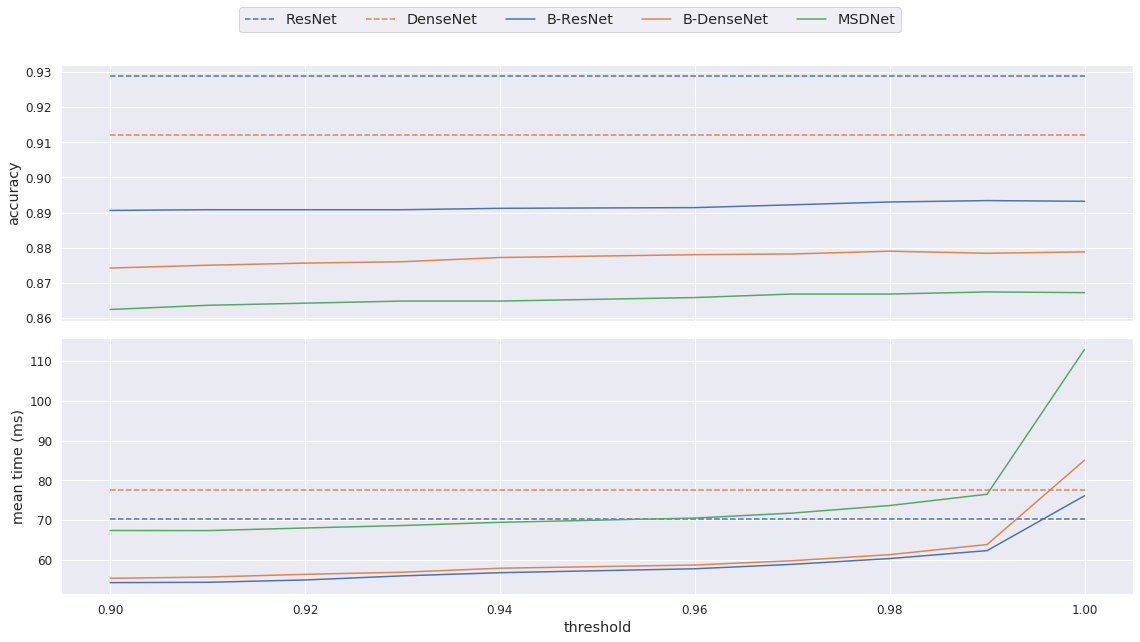

In [29]:
fig, axes = plt.subplots(2,1, sharex=True)
sns.lineplot(x=x, y=pc_runs['resnet'].correct.mean()*np.ones(10), ax=axes[0], color=current_palette[0])
sns.lineplot(x=x, y=pc_runs['resnet'].time.mean()*np.ones(10)*1000, ax=axes[1], color=current_palette[0])

sns.lineplot(x=x, y=pc_runs['densenet'].correct.mean()*np.ones(10), ax=axes[0],  color=current_palette[1])
sns.lineplot(x=x, y=pc_runs['densenet'].time.mean()*np.ones(10)*1000, ax=axes[1],  color=current_palette[1])

sns.lineplot(data=pc_runs_stats['b-resnet']['Mean Accuracy'], ax=axes[0], color=current_palette[0])
sns.lineplot(data=pc_runs_stats['b-resnet']['Mean Time']*1000, ax=axes[1], color=current_palette[0])

sns.lineplot(data=pc_runs_stats['b-densenet']['Mean Accuracy'], ax=axes[0], color=current_palette[1])
sns.lineplot(data=pc_runs_stats['b-densenet']['Mean Time']*1000, ax=axes[1], color=current_palette[1])

sns.lineplot(data=pc_runs_stats['msdnet']['Mean Accuracy'], ax=axes[0], color=current_palette[2])
sns.lineplot(data=pc_runs_stats['msdnet']['Mean Time']*1000, ax=axes[1], color=current_palette[2])

axes[0].set_ylabel('accuracy')
axes[1].set_ylabel('mean time (ms)')
plt.xlabel('threshold')



axes[0].lines[0].set_linestyle("--")

axes[1].lines[0].set_linestyle("--")

axes[0].lines[1].set_linestyle("--")

axes[1].lines[1].set_linestyle("--")


fig.legend([ 'ResNet', 'DenseNet', 'B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=5, loc="upper center")
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('jetson_inference_finegrained.png')

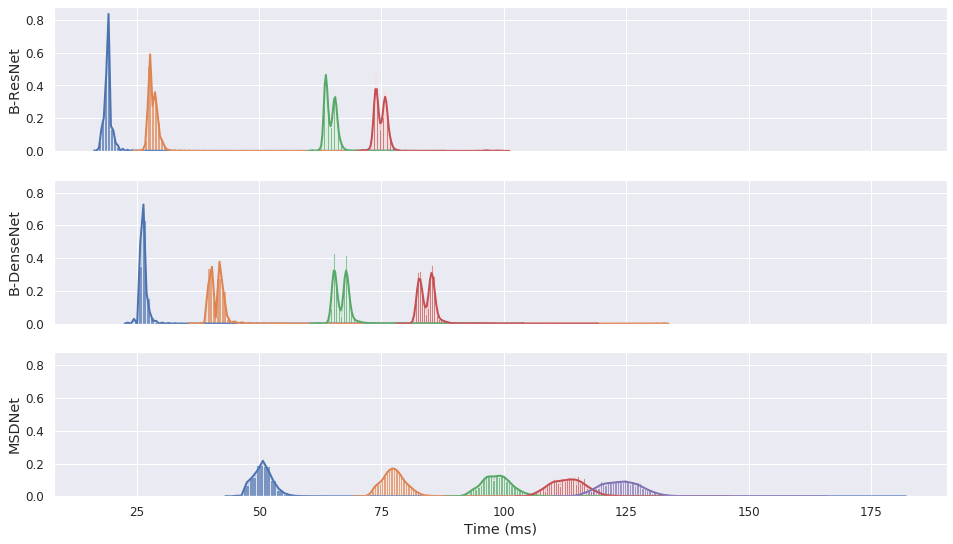

In [24]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
for exit in range(4):
    sns.distplot(pc_runs['b-resnet'].loc[pc_runs['b-resnet'].exit==exit].time[1:]*1000,ax=axes[0], **kwargs)
    sns.distplot(pc_runs['b-densenet'].loc[pc_runs['b-densenet'].exit==exit].time[1:]*1000,ax=axes[1], **kwargs)
for exit in range(5):
    sns.distplot(pc_runs['msdnet'].loc[pc_runs['msdnet'].exit==exit].time[1:]*1000,ax=axes[2], **kwargs)

labels = ['B-ResNet', 'B-DenseNet', 'MSDNet']
for ax, label in zip(axes.flat, labels):
    ax.set(xlabel='Time (ms)', ylabel=label)
    ax.label_outer()
plt.savefig('jetson_inference_time_distribution.png')

In [30]:
len(ee_res.loc[ee_res['exit']==0])

13389

In [31]:
len(ee_res.loc[(ee_res['exit']==0) & (ee_res['correct'] == False)])

3062

In [32]:
len(ee_res.loc[ee_res['exit']==1])

14011

In [33]:
len(ee_res.loc[ee_res['exit']==2])

14136

In [34]:
len(ee_res.loc[ee_res['exit']==3])

3463

In [35]:
len(ee_res.loc[(ee_res['exit']==3) & (ee_res['correct'] == False)])

1736

In [36]:
len(ee_res.loc[(ee_res['correct'] == False)])

8216

In [37]:
ee_res.groupby(['threshold', 'exit']).size()

threshold  exit
0.1        0.0     3297
           1.0     1252
           2.0      424
           3.0       26
0.2        0.0     2456
           1.0     1584
           2.0      875
           3.0       85
0.3        0.0     1940
           1.0     1704
           2.0     1184
           3.0      172
0.4        0.0     1571
           1.0     1717
           2.0     1448
           3.0      264
0.5        0.0     1285
           1.0     1708
           2.0     1653
           3.0      354
0.6        0.0     1029
           1.0     1673
           2.0     1853
           3.0      445
0.7        0.0      828
           1.0     1582
           2.0     2039
           3.0      551
0.8        0.0      615
           1.0     1489
           2.0     2220
           3.0      676
0.9        0.0      368
           1.0     1302
           2.0     2440
           3.0      890
dtype: int64

In [38]:
 ee_msd.groupby(['threshold', 'exit', 'correct']).size()

threshold  exit  correct
0.1        0.0   0.0        1020
                 1.0        3684
           1.0   0.0         114
                 1.0         141
           2.0   0.0          17
                            ... 
0.9        2.0   1.0         343
           3.0   0.0          53
                 1.0         128
           4.0   0.0         362
                 1.0         261
Length: 88, dtype: int64

In [39]:
ee_res.exit= ee_res.exit.astype('int')
d = {    'ResNet': ee_res.groupby(['threshold', 'exit', 'correct']).size(),
         'DenseNet': ee_dense.groupby(['threshold', 'exit', 'correct']).size(),
         'MSDNet': ee_msd.groupby(['threshold', 'exit', 'correct']).size()   }
df = pd.DataFrame(d)

df = df / 5000
df

ResNet  DenseNet  MSDNet
threshold exit correct                          
0.1       0.0  0.0      0.2498    0.2608  0.2040
               1.0      0.4096    0.4782  0.7368
          1.0  0.0      0.0816    0.0672  0.0228
               1.0      0.1688    0.1578  0.0282
          2.0  0.0      0.0194    0.0138  0.0034
...                        ...       ...     ...
0.9       2.0  1.0      0.4640    0.2234  0.0686
          3.0  0.0      0.0788    0.0876  0.0106
               1.0      0.0992    0.1376  0.0256
          4.0  0.0         NaN       NaN  0.0724
               1.0         NaN       NaN  0.0522

[88 rows x 3 columns]

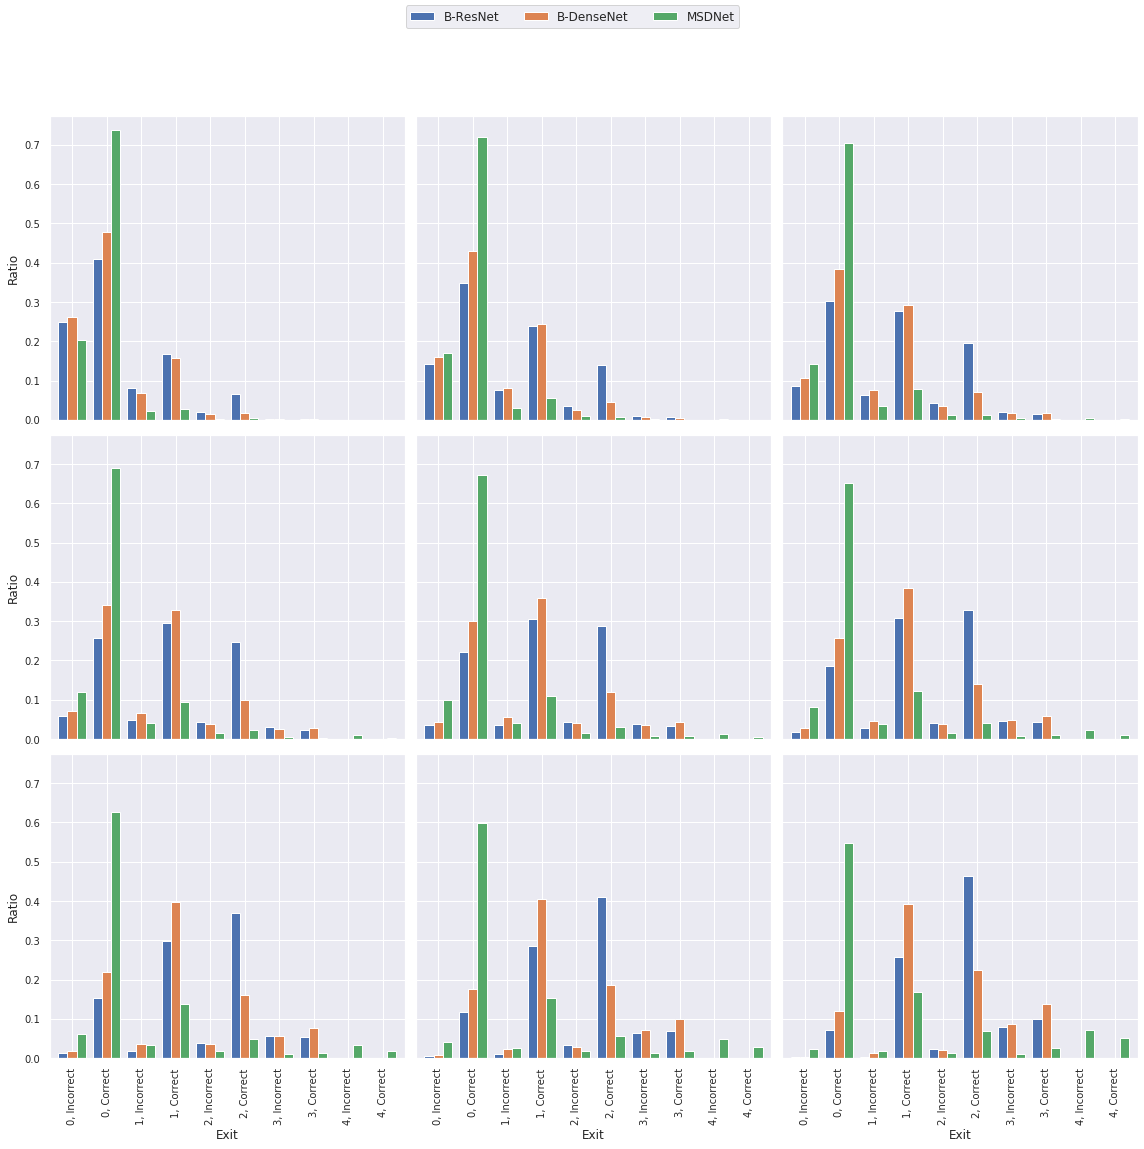

In [40]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(16,16))
for i, (ax, data) in enumerate(zip(axes.flat, df.groupby('threshold'))):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('inference_threshold_test.PNG')

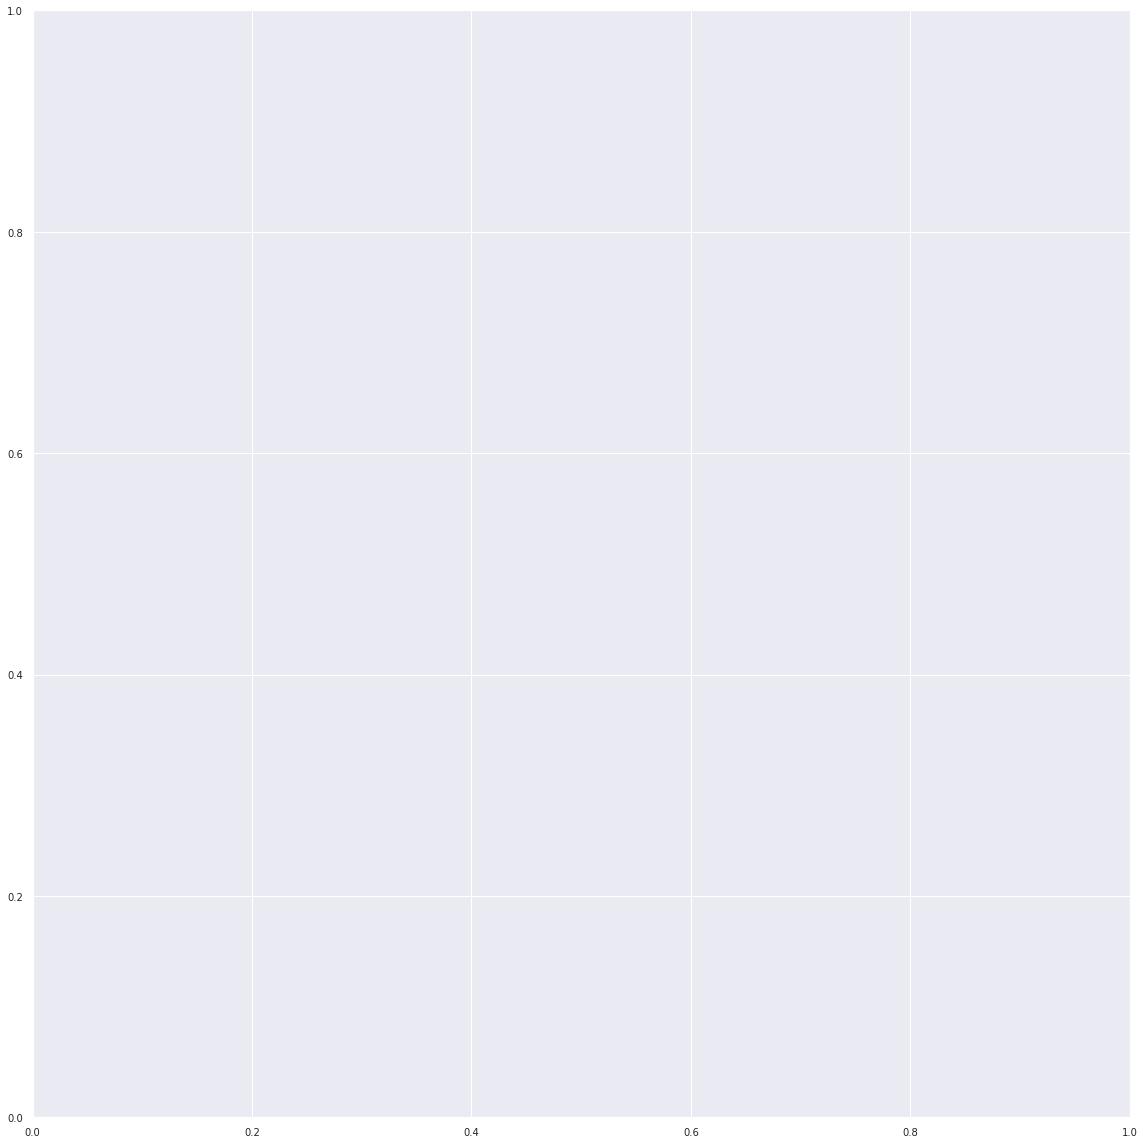

In [44]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(1,1, sharex=True, sharey=True, figsize=(16,16))
for i, (data) in enumerate(df.groupby('threshold')):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    #ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
#fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
#fig.subplots_adjust(top=0.90)
#plt.savefig('inference_threshold_test.PNG')

In [ ]:
np.arange(1,6)*0.5

In [ ]:
list(np.array([['Correct {}'.format(exit), 'Incorrect {}'.format(exit)] for exit in np.arange(5)]).flatten())

In [ ]:
df['ResNet']

In [ ]:
models = ['b-densenet', 'b-resnet', 'msdnet']
df = pd.DataFrame({
        'model':models,
        'exit-0':np.random.randn(3),
        'score2':np.random.randn(3),

                   })

df